In [126]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [129]:
class SquaredLoss(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, inputs, targets):
        loss = torch.mean((inputs - targets)**2)
        return loss

In [130]:
class Mydatasets(torch.utils.data.Dataset):
    def __init__(self):
        self.data = np.random.normal(0,1,(1000,2))
        self.label = np.dot(self.data, [2,-3.4]) + 4.2 + np.random.normal(0, 0.01, 1000)
        self.label = self.label.reshape((-1,1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]

In [131]:
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        nn.init.normal_(self.linear.weight, 0.0, 0.01)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [132]:
def train(model, loader, opt, epoch):
    model.train()
    correct = 0
    training_loss = 0
    
    for idx, (X, y) in enumerate(loader):
        opt.zero_grad()
        outputs = model(X.float())
        #loss = nn.MSELoss()(outputs, y.float())
        loss = SquaredLoss()(outputs, y.float())
        loss.backward()
        opt.step()
        correct += (outputs.max(dim=1)[1] == y).sum()
        training_loss += loss
        
        if (epoch+1) % 10 == 0:
            print('Train Epoch: {} \tLoss: {:.6f}'.format(epoch+1,  loss.data.item()))
            
            
        return correct / len(loader.dataset), training_loss / len(loader.dataset)

In [133]:
train_loader = torch.utils.data.DataLoader(Mydatasets(), batch_size=32, shuffle=True)
model = LinearRegression(2,1)
opt = optim.SGD(model.parameters(), lr=0.1)

for epoch in range(100):
    train_acc, train_loss = train(model, train_loader, opt, epoch)

Train Epoch: 10 	Loss: 0.786177
Train Epoch: 20 	Loss: 0.012739
Train Epoch: 30 	Loss: 0.000482
Train Epoch: 40 	Loss: 0.000141
Train Epoch: 50 	Loss: 0.000083
Train Epoch: 60 	Loss: 0.000170
Train Epoch: 70 	Loss: 0.000116
Train Epoch: 80 	Loss: 0.000078
Train Epoch: 90 	Loss: 0.000155
Train Epoch: 100 	Loss: 0.000125


In [134]:
params = [i for i in model.parameters()]
print('Learnt w: ', params[0].detach().numpy())
print('Learnt b: ', params[1].detach().numpy())
print('Error of w: ', [2,-3.4] - params[0].detach().numpy())
print('Error of b: ', 4.2 - params[1].detach().numpy())

Learnt w:  [[ 1.9996189 -3.3992703]]
Learnt b:  [4.1987844]
Error of w:  [[ 0.00038111 -0.0007297 ]]
Error of b:  [0.00121546]


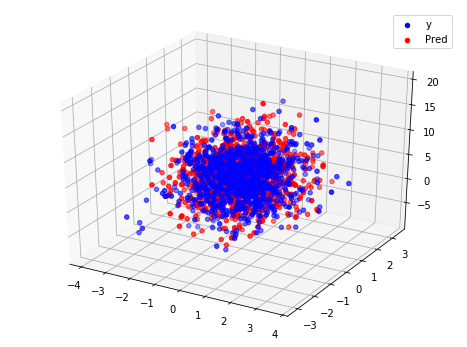

In [135]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Mydatasets().data[:,0], Mydatasets().data[:,1], Mydatasets().label, color='blue', label='y')
ax.scatter(Mydatasets().data[:,0], Mydatasets().data[:,1], model(torch.from_numpy(Mydatasets().data).float()).detach().numpy(), color='red', label='Pred')

plt.legend()
plt.show()

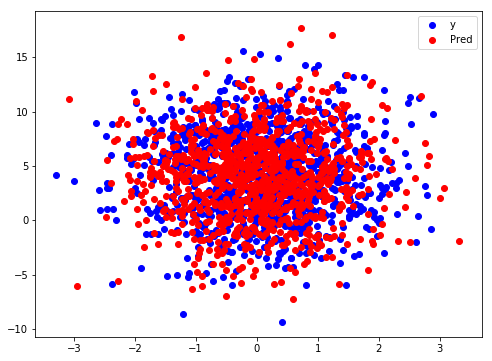

In [136]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(Mydatasets().data[:,0], Mydatasets().label, color='blue', label='y')
ax.scatter(Mydatasets().data[:,0], model(torch.from_numpy(Mydatasets().data).float()).detach().numpy(), color='red', label='Pred')

plt.legend()
plt.show()

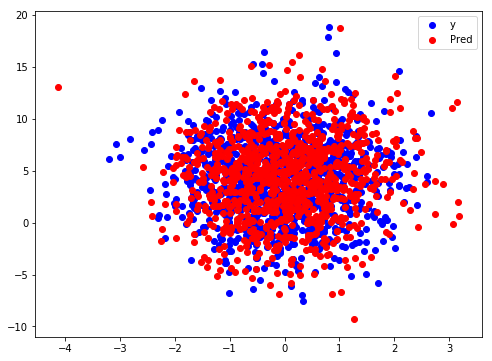

In [137]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(Mydatasets().data[:,1], Mydatasets().label, color='blue', label='y')
ax.scatter(Mydatasets().data[:,1], model(torch.from_numpy(Mydatasets().data).float()).detach().numpy(), color='red', label='Pred')

plt.legend()
plt.show()